In [3]:
import sys
sys.path.append("../src")
from utils import *
import gudhi.wasserstein
import numpy as np
import json

# Wasserstein

In [1]:
data_path = "../data/"
domains = ["tw", "az", "mv", "fi"]

In [4]:
bert_dict = load_bert(data_path, domains, 2000)

In [7]:
bert_dict['tw']

array([[ 0.16879809,  0.20386301,  0.12485105, ...,  0.09144359,
         0.42622706,  0.35297948],
       [ 0.17979693,  0.17714846,  0.12755731, ..., -0.22662926,
         0.56577098,  0.29162675],
       [-0.03082147,  0.12462155,  0.33992708, ..., -0.12671785,
         0.30370981,  0.40641078],
       ...,
       [ 0.01679105, -0.05794072,  0.26865858, ..., -0.09854423,
         0.20043452,  0.32295102],
       [-0.34330243,  0.08754142,  0.03121303, ..., -0.18173587,
         0.49394789,  0.29293314],
       [-0.00463631,  0.15481836,  0.00374458, ..., -0.15286168,
         0.42362815,  0.28003868]])

In [53]:
# costs = {}
# for domain1 in domains:
#     for domain2 in domains:
#         key = domain1 + "_" + domain2
#         cost, _ = gudhi.wasserstein.wasserstein_distance(bert_dict[domain1 + "2000"], bert_dict[domain2 + "2000"], matching=True, order=1, internal_p=2)
#         costs[key] = cost
costs

In [8]:
costs_matching_false = {}
for domain1 in domains:
    for domain2 in domains:
        key = domain1 + "_to_" + domain2
        cost = gudhi.wasserstein.wasserstein_distance(bert_dict[domain1], bert_dict[domain2], matching = False, order=1, internal_p=2)
        costs_matching_false[key] = cost

In [9]:
costs_matching_false

{'tw_to_tw': -259.58421784066746,
 'tw_to_az': -208.77176818410055,
 'tw_to_mv': -341.0015264568349,
 'tw_to_fi': -56.293118772074045,
 'az_to_tw': -208.77176818410112,
 'az_to_az': -359.29168516258244,
 'az_to_mv': -416.22717321514114,
 'az_to_fi': -131.51876553038102,
 'mv_to_tw': -341.00152645683335,
 'mv_to_az': -416.2271732151396,
 'mv_to_mv': -578.0109606507617,
 'mv_to_fi': -263.74852380311336,
 'fi_to_tw': -56.29311877207405,
 'fi_to_az': -131.5187655303806,
 'fi_to_mv': -263.7485238031135,
 'fi_to_fi': -79.50584750246301}

In [34]:
with open('../outputs/accuracies_ti_all_domains.json') as f:
    accuracies_ti = json.load(f)

# print(accuracies_ti)

t1_accuracies = {}
for exp in accuracies_ti:
    t1_accuracies_exp = []
    for group in accuracies_ti[exp]:
        if group != "no_self_train_adaptation_score":
            t1_accuracies_exp.append(accuracies_ti[exp][group][0])
        else:
            t1_accuracies_exp.append(accuracies_ti[exp][group])
    t1_accuracies[exp] = t1_accuracies_exp

# print(t1_accuracies)

tn_accuracies = {}
for exp in accuracies_ti:
    tn_accuracies_exp = []
    for group in accuracies_ti[exp]:
        if group != "no_self_train_adaptation_score":
            tn_accuracies_exp.append(accuracies_ti[exp][group][-1])
        else:
            tn_accuracies_exp.append(accuracies_ti[exp][group])
    tn_accuracies[exp] = tn_accuracies_exp

# print(tn_accuracies)

In [35]:
st_accuracies_improv_perc = {}
for exp in t1_accuracies:
    st_accuracies_improv_perc[exp] = (t1_accuracies[exp][1] - t1_accuracies[exp][0])/t1_accuracies[exp][0]*100
    
st_accuracies_improv = {}
for exp in t1_accuracies:
    st_accuracies_improv[exp] = (t1_accuracies[exp][1] - t1_accuracies[exp][0])
    
st_accuracies = {}
for exp in t1_accuracies:
    st_accuracies[exp] = t1_accuracies[exp][:4]

In [59]:
costs_matching_false, st_accuracies_improv, 

({'tw_tw': -259.58421784066746,
  'tw_az': -208.77176818410055,
  'tw_mv': -341.0015264568349,
  'tw_fi': -56.293118772074045,
  'az_tw': -208.77176818410112,
  'az_az': -359.29168516258244,
  'az_mv': -416.22717321514114,
  'az_fi': -131.51876553038102,
  'mv_tw': -341.00152645683335,
  'mv_az': -416.2271732151396,
  'mv_mv': -578.0109606507617,
  'mv_fi': -263.74852380311336,
  'fi_tw': -56.29311877207405,
  'fi_az': -131.5187655303806,
  'fi_mv': -263.7485238031135,
  'fi_fi': -79.50584750246301},
 {'tw_to_tw': -0.0024999999999999467,
  'tw_to_az': 0.0020000000000000018,
  'tw_to_mv': -0.0030000000000000027,
  'tw_to_fi': 0.0008438818565401629,
  'az_to_tw': -0.00649999999999995,
  'az_to_az': 0.0,
  'az_to_mv': -0.0025000000000000577,
  'az_to_fi': 0.0016877637130801038,
  'mv_to_tw': 0.0015000000000000568,
  'mv_to_az': -0.0010000000000000009,
  'mv_to_mv': -0.0004999999999999449,
  'mv_to_fi': -0.0008438818565400519,
  'fi_to_tw': 0.0,
  'fi_to_az': 0.0008438818565400519,
  'fi_t

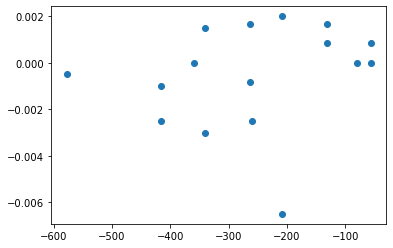

In [63]:
plt.scatter(costs_matching_false.values(), st_accuracies_improv.values())
plt.show()

# Maximum Mean Distance

In [12]:
# https://www.kaggle.com/onurtunali/maximum-mean-discrepancy
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.stats import multivariate_normal
from scipy.stats import dirichlet 
from torch.distributions.multivariate_normal import MultivariateNormal 

In [49]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def MMD(x, y, kernel):
    """Emprical maximum mean discrepancy. The lower the result
       the more evidence that distributions are the same.

    Args:
        x: first sample, distribution P
        y: second sample, distribution Q
        kernel: kernel type such as "multiscale" or "rbf"
    """
    xx, yy, zz = torch.mm(x, x.t()), torch.mm(y, y.t()), torch.mm(x, y.t())
    rx = (xx.diag().unsqueeze(0).expand_as(xx))
    ry = (yy.diag().unsqueeze(0).expand_as(yy))
    
    dxx = rx.t() + rx - 2. * xx # Used for A in (1)
    dyy = ry.t() + ry - 2. * yy # Used for B in (1)
    dxy = rx.t() + ry - 2. * zz # Used for C in (1)
    
    XX, YY, XY = (torch.zeros(xx.shape).to(device),
                  torch.zeros(xx.shape).to(device),
                  torch.zeros(xx.shape).to(device))
    
    if kernel == "multiscale":
        
        bandwidth_range = [0.2, 0.5, 0.9, 1.3]
        for a in bandwidth_range:
            XX += a**2 * (a**2 + dxx)**-1
            YY += a**2 * (a**2 + dyy)**-1
            XY += a**2 * (a**2 + dxy)**-1
            
    if kernel == "rbf":
      
        bandwidth_range = [10, 15, 20, 50]
        for a in bandwidth_range:
            XX += torch.exp(-0.5*dxx/a)
            YY += torch.exp(-0.5*dyy/a)
            XY += torch.exp(-0.5*dxy/a)

    return torch.mean(XX + YY - 2. * XY)

In [57]:
mdd_multi ={}
for source in ["tw", "az", "mv"]:
    for target in ["tw", "az", "mv"]:
        mdd_multi[source + "_to_" + target] = MMD(torch.Tensor(bert_dict[source]), torch.Tensor(bert_dict[target]), kernel="multiscale").item()
        
mdd_rbf ={}
for source in ["tw", "az", "mv"]:
    for target in ["tw", "az", "mv"]:
        mdd_rbf[source + "_to_" + target] = MMD(torch.Tensor(bert_dict[source]), torch.Tensor(bert_dict[target]), kernel="rbf").item()

In [58]:
mdd_multi, mdd_rbf

({'tw_to_tw': 0.0,
  'tw_to_az': 0.05946696922183037,
  'tw_to_mv': 0.11865703761577606,
  'az_to_tw': 0.059466976672410965,
  'az_to_az': 0.0,
  'az_to_mv': 0.059931132942438126,
  'mv_to_tw': 0.11865704506635666,
  'mv_to_az': 0.059931132942438126,
  'mv_to_mv': 0.0},
 {'tw_to_tw': 0.0,
  'tw_to_az': 0.6604963541030884,
  'tw_to_mv': 1.2572532892227173,
  'az_to_tw': 0.6604964137077332,
  'az_to_az': 0.0,
  'az_to_mv': 0.5300790667533875,
  'mv_to_tw': 1.2572532892227173,
  'mv_to_az': 0.5300790071487427,
  'mv_to_mv': 0.0})

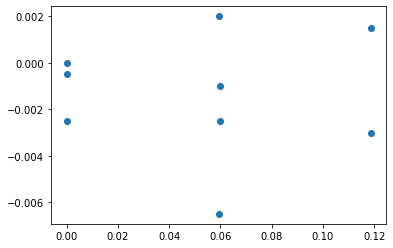

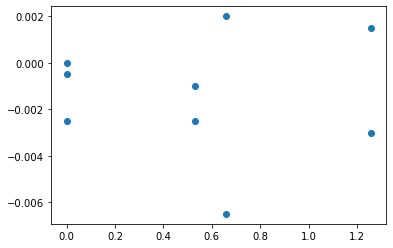

In [59]:
imprv = {}
for t in st_accuracies_improv:
    if t in mdd:
        imprv[t] = st_accuracies_improv[t]
imprv

st_accuracies_improv
plt.scatter(mdd_multi.values(), imprv.values())
plt.show()

st_accuracies_improv
plt.scatter(mdd_rbf.values(), imprv.values())
plt.show()

# Fisher
https://sthalles.github.io/fisher-linear-discriminant/

# LDA

In [82]:
import lda
import lda.datasets
model = lda.LDA(n_topics=20, n_iter=1500, random_state=1)

In [88]:
for data_type in ["az", "tw", "fi", "mv"]:
    exec(data_type + '_train = np.load("../data/all_bert/encoded_' + data_type + '_train_2000.npy")')
    exec(data_type + '_dev = np.load("../data/all_bert/encoded_' + data_type + '_dev_2000.npy")')
    exec("y_train_" + data_type + ' = np.load("../data/all_cleaned/y_train_'+ data_type + '.npy")')
    exec("y_dev_" + data_type + ' = np.load("../data/all_cleaned/y_dev_'+ data_type + '.npy")')
    exec("x_train_" + data_type + ' = np.load("../data/all_cleaned/X_train_'+ data_type + '.npy", allow_pickle=True)')
    exec("x_dev_" + data_type + ' = np.load("../data/all_cleaned/X_dev_'+ data_type + '.npy", allow_pickle=True)')

In [94]:
x_train_tw[0]

"I need to get out of town.  I watched Surf's Up and now I'm dying to go to the beach, haha. Thanks a lot, stupid surfing penguins!!!"

In [102]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuchen.zhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
data = x_train_tw
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['need', 'get', 'town', 'watched', 'surf', 'dying', 'go', 'beach', 'haha', 'thanks', 'lot', 'stupid', 'surfing', 'penguins']


In [103]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary(17692 unique tokens: ['beach', 'dying', 'get', 'go', 'haha']...)
INFO:gensim.corpora.dictionary:adding document #20000 to Dictionary(29122 unique tokens: ['beach', 'dying', 'get', 'go', 'haha']...)
INFO:gensim.corpora.dictionary:adding document #30000 to Dictionary(38523 unique tokens: ['beach', 'dying', 'get', 'go', 'haha']...)
INFO:gensim.corpora.dictionary:adding document #40000 to Dictionary(47220 unique tokens: ['beach', 'dying', 'get', 'go', 'haha']...)
INFO:gensim.corpora.dictionary:adding document #50000 to Dictionary(55245 unique tokens: ['beach', 'dying', 'get', 'go', 'haha']...)
INFO:gensim.corpora.dictionary:adding document #60000 to Dictionary(62937 unique tokens: ['beach', 'dying', 'get', 'go', 'haha']...)
INFO:gensim.corpora.dictionary:adding document #70000 to Dictionary(70237 unique tokens: ['beach', 'dying', 'get', 'g

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


In [104]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

INFO:gensim.models.ldamodel:using symmetric alpha at 0.1
INFO:gensim.models.ldamodel:using symmetric eta at 0.1
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 10 topics, 1 passes over the supplied corpus of 718240 documents, updating every 6000 documents, evaluating every ~60000 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 3 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/718240, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/718240, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/718240, outstanding queue size 3
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/718240, outstanding queue size

[(0,
  '0.066*"good" + 0.042*"thanks" + 0.019*"morning" + 0.010*"lol" + '
  '0.009*"luck" + 0.009*"follow" + 0.009*"bed" + 0.008*"like" + '
  '0.007*"nothing" + 0.007*"night"'),
 (1,
  '0.084*"http" + 0.061*"com" + 0.029*"bit" + 0.024*"twitpic" + 0.016*"ly" + '
  '0.015*"twitter" + 0.013*"new" + 0.010*"check" + 0.010*"www" + '
  '0.008*"tinyurl"'),
 (2,
  '0.029*"know" + 0.020*"lol" + 0.016*"would" + 0.016*"love" + 0.015*"haha" + '
  '0.014*"wish" + 0.014*"sorry" + 0.012*"could" + 0.011*"yeah" + 0.010*"one"'),
 (3,
  '0.026*"go" + 0.021*"work" + 0.019*"get" + 0.013*"getting" + 0.012*"need" + '
  '0.011*"got" + 0.010*"phone" + 0.010*"new" + 0.010*"ready" + 0.009*"back"'),
 (4,
  '0.075*"quot" + 0.027*"want" + 0.009*"said" + 0.007*"one" + 0.007*"go" + '
  '0.007*"amp" + 0.007*"watching" + 0.006*"awesome" + 0.006*"movie" + '
  '0.006*"like"'),
 (5,
  '0.021*"last" + 0.021*"got" + 0.018*"time" + 0.017*"night" + 0.016*"miss" + '
  '0.014*"going" + 0.013*"get" + 0.012*"school" + 0.012*"go" +

In [107]:
lda

/Users/yuchen.zhang/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<module 'lda' from '/Users/yuchen.zhang/anaconda3/lib/python3.8/site-packages/lda/__init__.py'>